In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

## Global parameters

In [2]:
# Transparency of Histograms
transp = 0.5

# If true will plot Zbb sample for signal
isZbb = False

# apply mass cut and save to separate files
applyMassCut = True

In [3]:
# Set default options for paper
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'figure.facecolor':'white'}
plt.rcParams.update(params)
plt.style.context('default')

In [4]:
feature_names = {'jetconstPt_log': r'$log(p_T)$',
                'jetconstEta_abs': r'$|\eta|$',
                'jetconstE_log': r'$log(E)$',
                'jetconstPt_Jetlog': r'$log(p_T / p_{T}_{jet}$',
                'jetMass': r'$m_{jet}$',
                'jetMassSD': r'$m_{jet, sd}$',
                'deltaR_subjets': r'$\Delta R_{subjets}$',
                'jetPt': r'$p_{T}_{jet}$',
                'z': r'$p_{T}_{subjet0} / \Sigma  p_{T}_{subjets}$',
                'tau1_b05': r'$\tau_{1}^{(0.5)}$',
                'tau2_b05': r'$\tau_{2}^{(0.5)}$',
                'tau3_b05': r'$\tau_{3}^{(0.5)}$',
                'tau1_sd_b05': r'$\tau_{1,sd}^{(0.5)}$',
                'tau2_sd_b05': r'$\tau_{2,sd}^{(0.5)}$',
                'tau3_sd_b05': r'$\tau_{3,sd}^{(0.5)}$',
                'tau1_b10': r'$\tau_{1}^{(1)}$',
                'tau2_b10': r'$\tau_{2}^{(1)}$',
                'tau3_b10': r'$\tau_{3}^{(1)}$',
                'tau1_sd_b10': r'$\tau_{1,sd}^{(1)}$',
                'tau2_sd_b10': r'$\tau_{2,sd}^{(1)}$',
                'tau3_sd_b10': r'$\tau_{3,sd}^{(1)}$',
                'tau1_b15': r'$\tau_{1}^{(1.5)}$',
                'tau2_b15': r'$\tau_{2}^{(1.5)}$',
                'tau3_b15': r'$\tau_{3}^{(1.5)}$',
                'tau1_sd_b15': r'$\tau_{1,sd}^{(1.5)}$',
                'tau2_sd_b15': r'$\tau_{2,sd}^{(1.5)}$',
                'tau3_sd_b15': r'$\tau_{3,sd}^{(1.5)}$',
                'tau1_b20': r'$\tau_{1}^{(2)}$',
                'tau2_b20': r'$\tau_{2}^{(2)}$',
                'tau3_b20': r'$\tau_{3}^{(2)}$',
                'tau1_sd_b20': r'$\tau_{1,sd}^{(2)}$',
                'tau2_sd_b20': r'$\tau_{2,sd}^{(2)}$',
                'tau3_sd_b20': r'$\tau_{3,sd}^{(2)}$',
                'charge': r'$q$',
                'isEle': r'$isEle$',
                'isPho': r'$isPho$',
                'isMuon': r'$isMuon$',
                'isCh': r'$isCh$',
                'isNh': r'$isNh$',
                'delta_eta': r'$\Delta \eta$',
                'delta_phi': r'$\Delta \phi$',
                'deltaR_jet': r'$\Delta R_{jet}$',
                'deltaR_subjet0': r'$\Delta R_{subjet0}$',
                'deltaR_subjet1': r'$\Delta R_{subjet1}$',
                'jetpull': r'$\Phi_{pull}$',
                'dxy': r'$d_{xy}$',
                'dz': r'$d_{z}$',
                'jetEta': r'$\eta_{jet}$',
                'jetPhi': r'$\phi_{jet}$',
                'chMult': r'$N_{CH}$',
                'neutMult': r'$N_{NH}$',
                'phoMult': r'$N_{\gamma}$',
                'eleMult': r'$N_{e}$',
                'muMult': r'$N_{\mu}$',
                'beta3': r'$\beta_{3}$',
                'beta3_sd': r'$\beta_{3, sd}$',
                'tau21': r'$\tau_{2}^{1} / \tau_{1}^{1}$',
                'dxy_max': r'$d_{xy\ max}$',
                'dz_max': r'$d_{z \max}$',}

In [5]:
fromShowJetsFile = ['jetImages',
'jetPt',
'jetEta',
'jetPhi',
'jetMass',
'jetMassSD',
'deltaR_subjets',
'z',
'tau1_b05',
'tau2_b05',
'tau3_b05',
'tau1_sd_b05',
'tau2_sd_b05',
'tau3_sd_b05',
'tau1_b10',
'tau2_b10',
'tau3_b10',
'tau1_sd_b10',
'tau2_sd_b10',
'tau3_sd_b10',
'tau1_b15',
'tau2_b15',
'tau3_b15',
'tau1_sd_b15',
'tau2_sd_b15',
'tau3_sd_b15',
'tau1_b20',
'tau2_b20',
'tau3_b20',
'tau1_sd_b20',
'tau2_sd_b20',
'tau3_sd_b20',
'chMult',
'neutMult',
'phoMult',
'eleMult',
'muMult',
'jetpull',
'labels']


fromConstituentsFile = ['jetconstPt_log',
'jetconstEta_abs',
'jetconstE_log',
'jetconstPt_Jetlog',
'jetMass',
'jetMassSD',
'deltaR_subjets',
'jetPt',
'z',
'charge',
'isEle',
'isPho',
'isMuon',
'isCh',
'isNh',
'delta_eta',
'delta_phi',
'deltaR_jet',
'deltaR_subjet0',
'deltaR_subjet1',
'dxy',
'dz']


## Define Functions

In [6]:
def Draw_HistoGram(feat,bins,minx,maxx, legend_loc = 'best'):
    tick_width = (maxx-minx)/5
    ii = feat_all.index(feat)
    fig, axs = plt.subplots(1, 1, tight_layout=True,figsize=(7.5,7.5))
    data_train_sig = data_train[feat][ind_train_sig].flatten()
    data_train_bkg = data_train[feat][ind_train_bkg].flatten()
    data_test_sig = data_test[feat][ind_test_sig].flatten()
    data_test_bkg = data_test[feat][ind_test_bkg].flatten()
    axs.hist(data_train_sig,
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_train_sig))/len(data_train_sig),
                fill = True,
                alpha = 0.55,
                label = 'Signal',
                log = False,
#                density = True,
                range = [minx,maxx],
                hatch = '/',
                edgecolor='k'
                );    
    axs.hist(data_train_bkg,
                bins = bins,
                histtype = 'step',
                weights = np.ones(len(data_train_bkg))/len(data_train_bkg),
                fill = True,
                alpha = 0.55,
                label = 'Background',
                log = False,
#                density = True,
                range = [minx,maxx],
                hatch = '\\',
                edgecolor='k'
                );
    axs.legend(loc = legend_loc);
    axs.set_xlim(minx,maxx)
    axs.xaxis.set_ticks(np.arange(minx, maxx + tick_width, tick_width))
    axs.set_xlabel('Normalized ' + feature_names[feat])
    axs.set_ylabel('Fraction')

    plt.savefig('plots/histogram/' + feat + '.png')

## Import data:
Using ShowJetsData_full.npz to build the CNN.

In [7]:
inputfile_exts = {'QCD':'_addmoretaus_QCD.npz',
                  'ZZ':'_addmoretaus_ZZ.npz',
                  'Zbb':'_addmoretaus_Zbb.npz',
                 }

filetypes = ['QCD','ZZ','Zbb']

Showjets_files = [np.load('/mnt/data/ml/ShowJetsData'+inputfile_exts[ext]) for ext in inputfile_exts.keys()]
Constituent_files = [np.load('/mnt/data/ml/Constituent4vec'+inputfile_exts[ext]) for ext in inputfile_exts.keys()]


In [8]:
data_dic  = {sample: {feat : data[feat]  for feat in fromConstituentsFile} for sample, data in zip(filetypes, Constituent_files)}
data_dic2 = {sample: {feat : data[feat]  for feat in fromShowJetsFile} for sample, data in zip(filetypes, Showjets_files)}


In [9]:
for key in data_dic.keys():
    data_dic[key].update(data_dic2[key])

In [11]:
del Showjets_files
del Constituent_files

In [12]:
n_data = len(data_dic['QCD']['labels'])

In [13]:
firstSample = [key for key in data_dic.keys()][0]

In [14]:
dxy_min = []
dz_min = []
dxymax_min = []
dzmax_min = []

for key in data_dic.keys():
    
    # Normalize tau's
    data_dic[key]['tau1_b05'] = data_dic[key]['tau1_b05']/data_dic[key]['jetPt']
    data_dic[key]['tau2_b05'] = data_dic[key]['tau2_b05']/data_dic[key]['jetPt']
    data_dic[key]['tau3_b05'] = data_dic[key]['tau3_b05']/data_dic[key]['jetPt']
    data_dic[key]['tau1_sd_b05'] = data_dic[key]['tau1_sd_b05']/data_dic[key]['jetPt']
    data_dic[key]['tau2_sd_b05'] = data_dic[key]['tau2_sd_b05']/data_dic[key]['jetPt']
    data_dic[key]['tau3_sd_b05'] = data_dic[key]['tau3_sd_b05']/data_dic[key]['jetPt']
    data_dic[key]['tau1_b10'] = data_dic[key]['tau1_b10']/data_dic[key]['jetPt']
    data_dic[key]['tau2_b10'] = data_dic[key]['tau2_b10']/data_dic[key]['jetPt']
    data_dic[key]['tau3_b10'] = data_dic[key]['tau3_b10']/data_dic[key]['jetPt']
    data_dic[key]['tau1_sd_b10'] = data_dic[key]['tau1_sd_b10']/data_dic[key]['jetPt']
    data_dic[key]['tau2_sd_b10'] = data_dic[key]['tau2_sd_b10']/data_dic[key]['jetPt']
    data_dic[key]['tau3_sd_b10'] = data_dic[key]['tau3_sd_b10']/data_dic[key]['jetPt']
    data_dic[key]['tau1_b20'] = data_dic[key]['tau1_b20']/data_dic[key]['jetPt']
    data_dic[key]['tau2_b20'] = data_dic[key]['tau2_b20']/data_dic[key]['jetPt']
    data_dic[key]['tau3_b20'] = data_dic[key]['tau3_b20']/data_dic[key]['jetPt']
    data_dic[key]['tau1_sd_b20'] = data_dic[key]['tau1_sd_b20']/data_dic[key]['jetPt']
    data_dic[key]['tau2_sd_b20'] = data_dic[key]['tau2_sd_b20']/data_dic[key]['jetPt']
    data_dic[key]['tau3_sd_b20'] = data_dic[key]['tau3_sd_b20']/data_dic[key]['jetPt']

    # Build ratios with normalized tau's 
    data_dic[key]['beta3'] = np.log(np.power(data_dic[key]['tau1_b05'],2) * np.sqrt(data_dic[key]['tau2_b10']) / data_dic[key]['tau2_b20'])
    data_dic[key]['beta3_sd'] = np.log(data_dic[key]['tau2_sd_b20']/data_dic[key]['tau1_sd_b05']/data_dic[key]['tau2_sd_b10'])
    data_dic[key]['tau21'] = data_dic[key]['tau2_b10']/data_dic[key]['tau1_b10']
    
    
    #absolute value of jetpull
    data_dic[key]['jetpull_abs'] = np.abs(data_dic[key]['jetpull'])


    # dxy_max and dz_max take log of dxy and dz
    data_dic[key]['dxy_max'] = np.nanmax(np.abs(data_dic[key]['dxy']), axis=1)
    data_dic[key]['dz_max'] = np.nanmax(np.abs(data_dic[key]['dz']), axis=1)

    data_dic[key]['dxy'] = np.log(np.abs(data_dic[key]['dxy']))
    data_dic[key]['dz'] = np.log(np.abs(data_dic[key]['dz']))
    data_dic[key]['dxy_max'] = np.log(np.abs(data_dic[key]['dxy_max']))
    data_dic[key]['dz_max'] = np.log(np.abs(data_dic[key]['dz_max']))

    
    # remove and pad -inf from log(0)
    data_dic[key]['dxy'][np.abs(data_dic[key]['dxy']) == np.inf] = 99
    data_dic[key]['dz'][np.abs(data_dic[key]['dz']) == np.inf] = 99
    data_dic[key]['dxy_max'][np.abs(data_dic[key]['dxy_max']) == np.inf] = 99
    data_dic[key]['dz_max'][np.abs(data_dic[key]['dz_max']) == np.inf] = 99

    dxy_min.append(np.nanmin(data_dic[key]['dxy']))
    dz_min.append(np.nanmin(data_dic[key]['dz']))
    dxymax_min.append(np.nanmin(data_dic[key]['dxy']))
    dzmax_min.append(np.nanmin(data_dic[key]['dz']))


    # re-pad charge from -99 to -2
    # re-pad delta variables from -99 to -1
    
    data_dic[key]['charge'][np.abs(data_dic[key]['charge']) > 1] = -2
    data_dic[key]['delta_eta'][data_dic[key]['delta_eta'] == -99] = -1
    data_dic[key]['delta_phi'][data_dic[key]['delta_phi'] == -99] = -1
    data_dic[key]['deltaR_jet'][data_dic[key]['deltaR_jet'] == -99] = -1
    data_dic[key]['deltaR_subjet0'][data_dic[key]['deltaR_subjet0'] == -99] = -1
    data_dic[key]['deltaR_subjet1'][data_dic[key]['deltaR_subjet1'] == -99] = -1
    


    
# moving -inf in log(dxy) and log(dz) to minimum

dxy_min_all = np.min(np.array(dxy_min))
dz_min_all = np.min(np.array(dz_min))  
dxymax_min_all = np.min(np.array(dxymax_min))
dzmax_min_all = np.min(np.array(dzmax_min)) 

for key in data_dic.keys():
    
    data_dic[key]['dxy'][data_dic[key]['dxy'] == 99] = dxy_min_all
    data_dic[key]['dz'][data_dic[key]['dz'] == 99] = dz_min_all
    data_dic[key]['dxy_max'][data_dic[key]['dxy_max'] == 99] = dxymax_min_all
    data_dic[key]['dz_max'][data_dic[key]['dz_max'] == 99] = dzmax_min_all
    
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in true_divide


### Remove Events with NaN values

In [15]:

NaN_idx={key:np.concatenate((np.argwhere(np.isnan(data_dic[key]['beta3'])), np.argwhere(np.isnan(data_dic[key]['beta3_sd'])), np.argwhere(np.isnan(data_dic[key]['dxy_max'])), np.argwhere(np.isnan(data_dic[key]['dz_max'])))).flatten() for key in data_dic.keys()}



In [16]:
for key in data_dic.keys():
    for feat in data_dic['QCD'].keys():
        
        nans = data_dic['QCD'][feat][np.isnan(data_dic['QCD'][feat])].flatten()
        infs = data_dic['QCD'][feat][data_dic['QCD'][feat] == -np.inf]
        
        if(len(infs) > 0 ):
            print(key, feat)

### Apply Mass Cut

In [17]:
if(applyMassCut):
    
    
    massCut = {key: (data_dic[key]['jetMassSD'] > 50) & (data_dic[key]['jetMassSD'] < 150) for key in data_dic.keys()}
    for key in data_dic.keys():
        massCut[key] =  np.delete(massCut[key],NaN_idx[key],0)
    

In [18]:
for key in data_dic.keys():
    for feat in data_dic[key].keys():
        data_dic[key][feat] = np.delete(data_dic[key][feat],NaN_idx[key],0)
        if(applyMassCut):
            
            data_dic[key][feat] = data_dic[key][feat][massCut[key]]
        

Image dimensions and list of all features

In [19]:
# Save images dimensions
grid = len(data_dic['QCD']['jetImages'][0])



In [20]:
[key for key in data_dic['QCD'].keys()]

['jetconstPt_log',
 'jetconstEta_abs',
 'jetconstE_log',
 'jetconstPt_Jetlog',
 'jetMass',
 'jetMassSD',
 'deltaR_subjets',
 'jetPt',
 'z',
 'charge',
 'isEle',
 'isPho',
 'isMuon',
 'isCh',
 'isNh',
 'delta_eta',
 'delta_phi',
 'deltaR_jet',
 'deltaR_subjet0',
 'deltaR_subjet1',
 'dxy',
 'dz',
 'jetImages',
 'jetEta',
 'jetPhi',
 'tau1_b05',
 'tau2_b05',
 'tau3_b05',
 'tau1_sd_b05',
 'tau2_sd_b05',
 'tau3_sd_b05',
 'tau1_b10',
 'tau2_b10',
 'tau3_b10',
 'tau1_sd_b10',
 'tau2_sd_b10',
 'tau3_sd_b10',
 'tau1_b15',
 'tau2_b15',
 'tau3_b15',
 'tau1_sd_b15',
 'tau2_sd_b15',
 'tau3_sd_b15',
 'tau1_b20',
 'tau2_b20',
 'tau3_b20',
 'tau1_sd_b20',
 'tau2_sd_b20',
 'tau3_sd_b20',
 'chMult',
 'neutMult',
 'phoMult',
 'eleMult',
 'muMult',
 'jetpull',
 'labels',
 'beta3',
 'beta3_sd',
 'tau21',
 'jetpull_abs',
 'dxy_max',
 'dz_max']

## Balance and Normalize data and split into train and test

Build list of signal and background indices, balance them, shuffle, split to train and test and combine back.

In [21]:
split = 0.9

In [22]:
np.random.seed(1)

# get signal column of label array
ind_label = 1
if (isZbb): ind_label = 2

# split signal and background indices
ind_zbb_inb = np.argwhere(data_dic['Zbb']['labels'][:,2] == 1)[:,0]
ind_zz_inb = np.argwhere(data_dic['ZZ']['labels'][:,1] == 1)[:,0]
ind_qcd_inb = np.argwhere(data_dic['QCD']['labels'][:,0] == 1)[:,0]

# cut off data at size of smallest sample
len_data = np.min((len(ind_qcd_inb), len(ind_zz_inb), len(ind_zbb_inb)))

# balance data such that we have equal numbers of signal vs background
ind_zbb = np.random.choice(ind_zbb_inb, len_data)
ind_zz = np.random.choice(ind_zz_inb, len_data)
ind_qcd = np.random.choice(ind_qcd_inb, len_data)

# split into train and test indices
cut = int(split*len_data)
ind_train = {'QCD':ind_qcd[:cut],
             'ZZ':ind_zz[:cut], 
             'Zbb':ind_zbb[:cut]
            }
ind_test = {'QCD':ind_qcd[cut:],
             'ZZ':ind_zz[cut:], 
             'Zbb':ind_zbb[cut:]
            }


for key in ind_train.keys():
    ind_train[key] = ind_train[key]
    ind_test[key] = ind_test[key]


In [23]:
print(len(ind_qcd))
print(len(ind_zz))
print(len(ind_zbb))

208185
208185
208185


In [24]:
norm = ['jetconstPt_log',
 'jetconstEta_abs',
 'jetconstE_log',
 'jetconstPt_Jetlog',
 'jetMass',
 'jetMassSD',
 'deltaR_subjets',
 'jetPt',
 'z',
 'tau1_b05',
 'tau2_b05',
 'tau3_b05',
 'tau1_sd_b05',
 'tau2_sd_b05',
 'tau3_sd_b05',
 'tau1_b10',
 'tau2_b10',
 'tau3_b10',
 'tau1_sd_b10',
 'tau2_sd_b10',
 'tau3_sd_b10',
 'tau1_b15',
 'tau2_b15',
 'tau3_b15',
 'tau1_sd_b15',
 'tau2_sd_b15',
 'tau3_sd_b15',
 'tau1_b20',
 'tau2_b20',
 'tau3_b20',
 'tau1_sd_b20',
 'tau2_sd_b20',
 'tau3_sd_b20',
 'delta_eta',
 'delta_phi',
 'deltaR_jet',
 'deltaR_subjet0',
 'deltaR_subjet1',
 'jetpull',
 'dxy',
 'dz',
 'jetImages',
 'jetEta',
 'jetPhi',
 'chMult',
 'neutMult',
 'phoMult',
 'eleMult',
 'muMult',
 'beta3',
 'beta3_sd',
 'tau21',
 'jetpull_abs',
 'dxy_max',
 'dz_max',
 'charge',
       ]

stand = []

Build two dictionaries with train and test data.

In [25]:
#THIS CODE SETS ALL VALUES OUTSIDE OF 3 SIGMA RANGE TO THE LAST ALLOWED BIN
for feat in data_dic['QCD'].keys():
    for key in data_dic.keys():
        if feat in ['jetImages', 'labels']:
            continue
        elif 'is' in feat:
            continue
        else:
            #print(feat)
            if(key==firstSample):
                std = np.std(np.concatenate((data_dic['QCD'][feat], data_dic['Zbb'][feat], data_dic['ZZ'][feat]), axis=0).flatten())
                mean = np.mean(np.concatenate((data_dic['QCD'][feat], data_dic['Zbb'][feat], data_dic['ZZ'][feat]), axis=0).flatten())
            data_dic[key][feat][data_dic[key][feat] > mean + 3 * std] = mean + 3 * std
            data_dic[key][feat][data_dic[key][feat] < mean - 3 * std] = mean - 3 * std

In [26]:
for feat in data_dic['QCD'].keys():
    
    sub_train = {key: data_dic[key][feat][ind_train[key]] for key in data_dic.keys()}
    sub_test = {key: data_dic[key][feat][ind_test[key]] for key in data_dic.keys()}

In [27]:
data_train = {'QCD':{},
             'ZZ':{},
             'Zbb':{},}
data_test = {'QCD':{},
            'ZZ':{},
            'Zbb':{},}

for feat in data_dic['QCD'].keys():
    
    sub_train = {key: data_dic[key][feat][ind_train[key]] for key in data_dic.keys()}
    sub_test = {key: data_dic[key][feat][ind_test[key]] for key in data_dic.keys()}
    for key in data_dic.keys():
        if feat == 'jetImages':
            if(key==firstSample):
                minn = np.min(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0))
                maxx = np.max(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0))
            data_train[key][feat] = (sub_train[key]-minn)/(maxx-minn)
            data_test[key][feat] = (sub_test[key]-minn)/(maxx-minn)
        elif feat in norm:
            if(key==firstSample):
                minn = np.min(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
                maxx = np.max(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
            data_train[key][feat] = (sub_train[key]-minn)/(maxx-minn)
            data_test[key][feat] = (sub_test[key]-minn)/(maxx-minn)
        elif feat in stand:
            mu = np.mean(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
            std = np.std(np.concatenate((sub_train['QCD'],sub_test['QCD'],sub_train['ZZ'],sub_test['ZZ'],sub_train['Zbb'],sub_test['Zbb']),axis=0).flatten(),axis=0)
            data_train[key][feat] = (sub_train[key]-mu)/std
            data_test[key][feat] = (sub_test[key]-mu)/std
        else:
            data_train[key][feat] = sub_train[key]
            data_test[key][feat] = sub_test[key]
            

In [28]:
n_train = len(data_train['QCD']['jetPt'])
print(n_train)
n_test = len(data_test['QCD']['jetPt'])
print(n_test)

187366
20819


## Plots to Check

Plotting ..........................................................................................................................................................................................

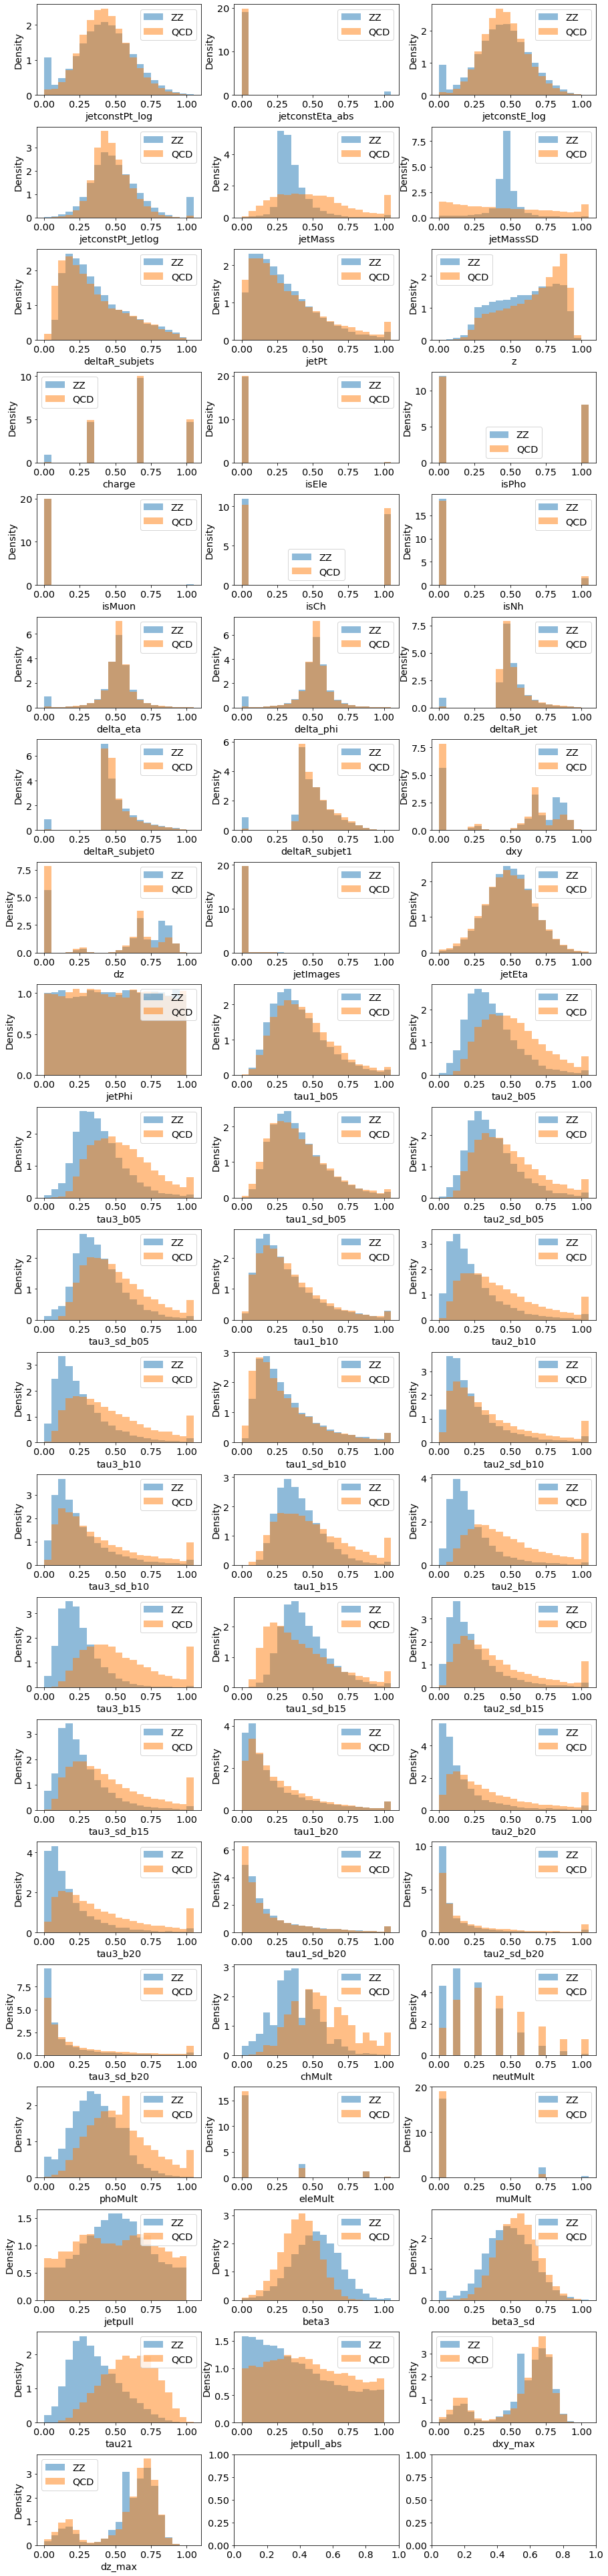

In [29]:
rows = int(np.ceil(len(data_dic['QCD'].keys()) / 3))

fig, axes = plt.subplots(nrows=rows, ncols=3, figsize=(15, 3.5*20))

row = 0
col = 0

print('Plotting ...', end='')

for name in data_dic['QCD'].keys():
    
    if('labels' in name): continue

    ax = axes[row][col]
        
    #ax.hist(data_test['Zbb'][name].flatten(), bins=np.linspace(0,1.05,22), alpha=0.5, density=True, label='Zbb')
    ax.hist(data_test['ZZ'][name].flatten(), bins=np.linspace(0,1.05,22), alpha=0.5, density=True, label='ZZ')
    ax.hist(data_test['QCD'][name].flatten(), bins=np.linspace(0,1.05,22), alpha=0.5, density=True, label='QCD')


    ax.set_xlabel(name)
    ax.set_ylabel('Density')
    ax.legend()
    #ax.set_yscale('log')


    col += 1
    if(col > 2):
        col=0
        row += 1

    print('...', end='')
    
    
plt.subplots_adjust(hspace=0.35)

### Create labels

In [30]:
# recreating labels separately in np.savez because labels in data dictionaries are not floats

train_labs = {'QCD': np.array(np.vstack((np.ones(n_train), np.zeros(n_train), np.zeros(n_train))).T, dtype=float),
             'ZZ':  np.array(np.vstack((np.zeros(n_train), np.ones(n_train), np.zeros(n_train))).T, dtype=float),
             'Zbb': np.array(np.vstack((np.zeros(n_train), np.zeros(n_train), np.ones(n_train))).T, dtype=float),
            }
test_labs = {'QCD': np.array(np.vstack((np.ones(n_test), np.zeros(n_test), np.zeros(n_test))).T, dtype=float),
              'ZZ':  np.array(np.vstack((np.zeros(n_test), np.ones(n_test), np.zeros(n_test))).T, dtype=float),
              'Zbb': np.array(np.vstack((np.zeros(n_test), np.zeros(n_test), np.ones(n_test))).T, dtype=float),
            }


for key in data_train.keys():
    data_train[key].pop('labels')
    data_test[key].pop('labels')



## Save training and testing QCD, ZZ, and Zbb dictionaries to separate npz files

In [31]:
loc = '/mnt/data/ml/PreProcessing/'
ext = ''

if(applyMassCut):
    ext = ext+'_MassCut'


In [32]:
np.savez(loc+'ShowJets_train_QCD'+ext, **data_train['QCD'], labels = train_labs['QCD'])
np.savez(loc+'ShowJets_test_QCD'+ext, **data_test['QCD'], labels = test_labs['QCD'])

In [33]:
np.savez(loc+'ShowJets_train_ZZ'+ext,**data_train['ZZ'], labels = train_labs['ZZ'])
np.savez(loc+'ShowJets_test_ZZ'+ext,**data_test['ZZ'], labels = test_labs['ZZ'])

In [34]:
np.savez(loc+'ShowJets_train_Zbb'+ext,**data_train['Zbb'], labels = train_labs['Zbb'])
np.savez(loc+'ShowJets_test_Zbb'+ext,**data_test['Zbb'], labels = test_labs['Zbb'])

## Correlation Matrix

In [35]:
xaugs = [ 'jetMass',
          'jetMassSD',
          'deltaR_subjets',
          'z',
          'tau1_b05',
          'tau2_b05',
          'tau3_b05',
          'tau1_sd_b05',
          'tau2_sd_b05',
          'tau3_sd_b05',
          'tau1_b10',
          'tau2_b10',
          'tau3_b10',
          'tau1_sd_b10',
          'tau2_sd_b10',
          'tau3_sd_b10',
          'tau1_b15',
          'tau2_b15',
          'tau3_b15',
          'tau1_sd_b15',
          'tau2_sd_b15',
          'tau3_sd_b15',
          'tau1_b20',
          'tau2_b20',
          'tau3_b20',
          'tau1_sd_b20',
          'tau2_sd_b20',
          'tau3_sd_b20',
          'jetpull',
          'chMult',
          'neutMult',
          'phoMult',
          'eleMult',
          'muMult',
          'beta3',
          'beta3_sd',
          'tau21',
          'dxy_max',
         'dz_max',
        ]

In [36]:
data_train_corr = {feat: data_train['QCD'][feat].flatten() for feat in xaugs}
data_test_corr =  {feat: data_test['QCD'][feat].flatten() for feat in xaugs}

In [37]:
df_train = pd.DataFrame(data_train_corr,columns=xaugs)
df_test = pd.DataFrame(data_test_corr,columns=xaugs)

In [38]:
corrMat_train = df_train.corr()
corrMat_test = df_test.corr()

In [39]:
corrMat_train

,jetMass,jetMassSD,deltaR_subjets,z,tau1_b05,tau2_b05,tau3_b05,tau1_sd_b05,tau2_sd_b05,tau3_sd_b05,...,chMult,neutMult,phoMult,eleMult,muMult,beta3,beta3_sd,tau21,dxy_max,dz_max
jetMass,1.000000,0.507580,-0.300632,-0.029564,-0.177259,-0.152768,-0.176890,-0.280787,-0.312852,-0.331750,...,0.536530,0.285612,0.533356,0.096749,0.040304,-0.258878,-0.195834,0.144242,0.086891,0.037404
jetMassSD,0.507580,1.000000,0.373145,-0.021387,0.225562,0.108044,0.083168,0.280306,0.191946,0.181161,...,0.202440,0.107631,0.167047,0.036352,0.019155,0.212724,0.246334,-0.305895,0.030080,0.023840
deltaR_subjets,-0.300632,0.373145,1.000000,0.118482,0.636889,0.573729,0.581112,0.701899,0.686453,0.709922,...,-0.275905,-0.105320,-0.395936,-0.069938,-0.008276,0.239983,0.661542,-0.219483,-0.070831,-0.017938
z,-0.029564,-0.021387,0.118482,1.000000,-0.392840,-0.070439,-0.082872,-0.367848,-0.045540,-0.054334,...,-0.053218,-0.020949,-0.059683,-0.016259,-0.005359,-0.504938,0.505101,0.439962,-0.008611,-0.010508
tau1_b05,-0.177259,0.225562,0.636889,-0.392840,1.000000,0.868287,0.852277,0.968736,0.858207,0.845989,...,0.070739,0.069313,-0.068537,-0.020590,0.014657,0.609267,0.164200,-0.059725,-0.033115,0.010059
tau2_b05,-0.152768,0.108044,0.573729,-0.070439,0.868287,1.000000,0.971035,0.806305,0.937744,0.912985,...,0.221092,0.150524,0.062110,-0.006477,0.019066,0.402208,0.279072,0.362913,-0.025277,0.011067
tau3_b05,-0.176890,0.083168,0.581112,-0.082872,0.852277,0.971035,1.000000,0.789637,0.911684,0.930827,...,0.224673,0.152883,0.059691,-0.010601,0.012948,0.362940,0.301546,0.329838,-0.032791,0.004112
tau1_sd_b05,-0.280787,0.280306,0.701899,-0.367848,0.968736,0.806305,0.789637,1.000000,0.879873,0.867887,...,-0.029181,0.009883,-0.149147,-0.033822,0.006169,0.659729,0.191914,-0.165835,-0.042076,0.004628
tau2_sd_b05,-0.312852,0.191946,0.686453,-0.045540,0.858207,0.937744,0.911684,0.879873,1.000000,0.975120,...,0.080345,0.067787,-0.056462,-0.025352,0.006603,0.495067,0.329157,0.205309,-0.040130,0.003035
tau3_sd_b05,-0.331750,0.181161,0.709922,-0.054334,0.845989,0.912985,0.930827,0.867887,0.975120,1.000000,...,0.076509,0.064851,-0.064708,-0.029929,0.000199,0.468088,0.369754,0.163614,-0.047906,-0.003671


In [40]:
corrMat_test

,jetMass,jetMassSD,deltaR_subjets,z,tau1_b05,tau2_b05,tau3_b05,tau1_sd_b05,tau2_sd_b05,tau3_sd_b05,...,chMult,neutMult,phoMult,eleMult,muMult,beta3,beta3_sd,tau21,dxy_max,dz_max
jetMass,1.000000,0.502126,-0.301573,-0.028637,-0.168587,-0.146595,-0.168630,-0.274407,-0.308718,-0.328559,...,0.538218,0.285746,0.530716,0.093708,0.046438,-0.252004,-0.198815,0.149431,0.091434,0.041100
jetMassSD,0.502126,1.000000,0.377429,-0.020361,0.228388,0.107095,0.079870,0.286037,0.195699,0.182949,...,0.191300,0.097303,0.143322,0.031541,0.007434,0.217664,0.248605,-0.315775,0.034055,0.026633
deltaR_subjets,-0.301573,0.377429,1.000000,0.115614,0.635960,0.573683,0.578881,0.702818,0.689223,0.712241,...,-0.274804,-0.101986,-0.400320,-0.075839,-0.020377,0.244877,0.661934,-0.226472,-0.064534,-0.012945
z,-0.028637,-0.020361,0.115614,1.000000,-0.395050,-0.071615,-0.080595,-0.369964,-0.046082,-0.053152,...,-0.049033,-0.000609,-0.057860,-0.012374,-0.008157,-0.507887,0.503682,0.440102,-0.005542,-0.006468
tau1_b05,-0.168587,0.228388,0.635960,-0.395050,1.000000,0.868516,0.849719,0.967470,0.857614,0.844399,...,0.073019,0.067728,-0.069291,-0.025493,0.012367,0.611776,0.160891,-0.063686,-0.032648,0.006786
tau2_b05,-0.146595,0.107095,0.573683,-0.071615,0.868516,1.000000,0.969651,0.804733,0.936179,0.911100,...,0.225241,0.151878,0.062908,-0.008586,0.013003,0.404238,0.273404,0.357168,-0.018771,0.014504
tau3_b05,-0.168630,0.079870,0.578881,-0.080595,0.849719,0.969651,1.000000,0.784322,0.907167,0.928695,...,0.231601,0.157711,0.064861,-0.010659,0.007338,0.362546,0.296737,0.325614,-0.025519,0.008033
tau1_sd_b05,-0.274407,0.286037,0.702818,-0.369964,0.967470,0.804733,0.784322,1.000000,0.879989,0.866474,...,-0.029577,0.007597,-0.155171,-0.037731,0.001871,0.662629,0.190377,-0.172584,-0.041968,0.001554
tau2_sd_b05,-0.308718,0.195699,0.689223,-0.046082,0.857614,0.936179,0.907167,0.879989,1.000000,0.973837,...,0.081741,0.067374,-0.063001,-0.027528,-0.003746,0.497544,0.327070,0.196036,-0.033998,0.006867
tau3_sd_b05,-0.328559,0.182949,0.712241,-0.053152,0.844399,0.911100,0.928695,0.866474,0.973837,1.000000,...,0.078192,0.068289,-0.069386,-0.029940,-0.010916,0.469411,0.368653,0.154746,-0.042235,-0.000459


## Plot Data

In [41]:
# feat_all = data_train['QCD'].keys()

In [42]:
# ind_train_sig = np.argwhere(data_train['QCD']['labels'][:,ind_label]==1)[:,0]
# ind_train_bkg = np.argwhere(data_train['QCD']['labels'][:,0]==1)[:,0]
# ind_test_sig = np.argwhere(data_test['QCD']['labels'][:,ind_label]==1)[:,0]
# ind_test_bkg = np.argwhere(data_test['QCD']['labels'][:,0]==1)[:,0]

### JetImages

In [43]:
# grid = 16
# #plot train and test signal
# sig_train_images = np.sum(data_train['ZZ']['jetImages'],axis=0).reshape(grid,grid)
# sig_test_images = np.sum(data_test['ZZ']['jetImages'],axis=0).reshape(grid,grid)
# bkg_train_images = np.sum(data_train['QCD']['jetImages'],axis=0).reshape(grid,grid)
# bkg_test_images = np.sum(data_test['QCD']['jetImages'],axis=0).reshape(grid,grid)

# extent_sig = [-sig_train_images.shape[1]/2., sig_train_images.shape[1]/2., -sig_train_images.shape[0]/2., sig_train_images.shape[0]/2. ]
# extent_bkg = [-bkg_train_images.shape[1]/2., bkg_train_images.shape[1]/2., -bkg_train_images.shape[0]/2., bkg_train_images.shape[0]/2. ]

# # Build figure with train and test set 
# fig = plt.figure(figsize = (12.5,8))
# ax1 = fig.add_subplot(121)
# im0 = ax1.imshow(sig_train_images,
#                       interpolation='nearest',
# #                      origin='low',
#                       cmap = 'Greens',
#                       norm=LogNorm(),
#                      vmin = 10,
#                      vmax = 200000,
#                       extent = extent_sig)
# ax1.set_title('Signal Images')
# fig.colorbar(im0,
#              fraction=0.0467, pad=0.02,
#              ax=ax1)
# # im1 = ax[1][0].imshow(sig_test_images,
# #                       interpolation='nearest',
# #                       origin='low',
# #                       cmap = 'Greens',
# #                       norm=LogNorm(),
# #                      vmin = 1,
# #                      vmax = 20000)
# # ax[1][0].set_title('Test Signal Images')
# # fig.colorbar(im1,shrink=0.8, ax=ax[1][0])
# ax2 = fig.add_subplot(122)
# im2 = ax2.imshow(bkg_train_images,
#                       interpolation='nearest',
# #                      origin='low',
#                       cmap = 'Greens',
#                       norm=LogNorm(),
#                      vmin = 10,
#                      vmax = 200000,
#                       extent = extent_bkg)
# ax2.set_title('Background Images')
# fig.colorbar(im2,
#              fraction=0.0467, pad=0.02,
#              ax=ax2)
# # im3 = ax[1][1].imshow(bkg_test_images,
# #                       interpolation='nearest',
# #                       origin='low',
# #                       cmap = 'Greens',
# #                       norm=LogNorm(),
# #                      vmin = 1,
# #                      vmax = 20000)
# # ax[1][1].set_title('Test Background Images')
# # fig.colorbar(im3,shrink=0.8, ax=ax[1][1])
# #plt.show()
# # plt.savefig('plots/histogram/jet_images.png')

### jetPt

In [44]:
# Draw_HistoGram('jetPt', 50, 0, 1)

### jetEta

In [45]:
# Draw_HistoGram('jetEta', 50, 0, 1)

### jetPhi

In [46]:
# Draw_HistoGram('jetPhi',50, 0, 1, legend_loc = 'lower right')

### jetMass

In [47]:
# Draw_HistoGram('jetMass',50, 0, 1)

In [48]:
# Draw_HistoGram('jetMassSD',50, 0, 1)

### tau1

In [49]:
# Draw_HistoGram('tau1_b05',50, 0, 1)

In [50]:
# Draw_HistoGram('tau1_b10',50, 0, 1)

In [51]:
# Draw_HistoGram('tau1_b20',50, 0, 1)

In [52]:
# Draw_HistoGram('tau1_sd_b05',50, 0, 1)

In [53]:
# Draw_HistoGram('tau1_sd_b10',50, 0, 1)

In [54]:
# Draw_HistoGram('tau1_sd_b20',50, 0, 1)

### tau2

In [55]:
# Draw_HistoGram('tau2_b05',50, 0, 1)

In [56]:
# Draw_HistoGram('tau2_b10',50, 0, 1)

In [57]:
# Draw_HistoGram('tau2_b20',50, 0, 1)

In [58]:
# Draw_HistoGram('tau2_sd_b05',50, 0, 1)

In [59]:
# Draw_HistoGram('tau2_sd_b10',50, 0, 1)

In [60]:
# Draw_HistoGram('tau2_sd_b20',50, 0, 1)

### tau3

In [61]:
# Draw_HistoGram('tau3_b05',50, 0, 1)

In [62]:
# Draw_HistoGram('tau3_b10',50, 0, 1)

In [63]:
# Draw_HistoGram('tau3_b20',50, 0, 1)

In [64]:
# Draw_HistoGram('tau3_sd_b05',50, 0, 1)

In [65]:
# Draw_HistoGram('tau3_sd_b10',50, 0, 1)

In [66]:
# Draw_HistoGram('tau3_sd_b20',50, 0, 1)

## beta_3

In [67]:
# Draw_HistoGram('beta3',50, 0, 1, legend_loc = 'upper left')

In [68]:
# Draw_HistoGram('beta3_sd',50, 0, 1)

## tau21

In [69]:
# Draw_HistoGram('tau21',50, 0, 1, legend_loc = 'upper center')

### charge Multiplicity

In [70]:
# Draw_HistoGram('chMult',10, 0, 1)

### neutral Multiplicity

In [71]:
# Draw_HistoGram('neutMult',8, 0, 1)

### photon Multiplicity

In [72]:
# Draw_HistoGram('phoMult',15, 0, 1)

### electron Multiplicity

In [73]:
# Draw_HistoGram('eleMult',3, 0, 1)

### muon Mult

In [74]:
# Draw_HistoGram('muMult',2, 0, 1)

### jetpull

In [75]:
# Draw_HistoGram('jetpull',50, 0, 1)